In [2]:
# standard data libraries
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import tree
import re

# math stuff
import numpy as np
import random


# plotting stuff
import matplotlib.cm as cm


# system stuff
from IPython.display import Image
import os

# census stuff
import pandas as pd
import censusdata
from tabulate import tabulate
# import cenpy

# plotting library
import plotly.figure_factory as ff


# set global variables and settings
sns.set_theme(style = 'darkgrid',
              palette='tab10',
             font_scale=1.5)
pd.options.display.max_colwidth = 200


# census libraries
import plotly.figure_factory as ff
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import contextily as ctx 
import geopandas as gpd 
import os 
from mpl_toolkits.axes_grid1 import make_axes_locatable


# set directories
data_dir = os.path.join(os.getcwd(), "..", "raw_data")

In [3]:
df = pd.read_csv(os.path.join(data_dir, "joined_depression_cre.csv"))

# dc_geo = censusdata.download('acs5', 
#                                2019,
#                                censusdata.censusgeo([('state', '11'), ('county', '*')]),
#                                ['B08301_001E'])
# dc_median_age = 
# cenpy.products.ACS(2018).from_place('Chicago, IL', level='tract', variables=['B01002_001E'])

In [4]:
for i in df.columns:
    print(i, '\t', df[i].dtype)

Indicator Name 	 object
What Is This Indicator 	 object
Location Type 	 object
Location 	 int64
Indicator Rate Value 	 float64
Indicator Rate Value Units 	 object
Rate Lower Confidence Interval 	 float64
Rate Upper Confidence Interval 	 float64
Indicator Count Value 	 float64
Indicator Count Value Units 	 float64
Count Lower Confidence Interval 	 float64
Count Upper Confidence Interval 	 float64
Indicator Value Unstable 	 object
Period of Measure 	 float64
Data Source 	 object
Technical Note 	 float64
Breakout Title 	 float64
Breakout Category 	 float64
Breakout Subcategory 	 float64
Breakout Rate Value 	 float64
Breakout Rate Value Units 	 float64
Breakout Rate Lower Confidence Interval 	 float64
Breakout Rate Upper Confidence Interval 	 float64
Breakout Count Value 	 float64
Breakout Count Value Units 	 float64
Breakout Count Lower Confidence Interval 	 float64
Breakout Count Upper Confidence Interval 	 float64
Breakout Unstable 	 float64
Breakout Footer 	 float64
GEO_ID 	 object
NAM

In [5]:
# Community Resilience (Definition based on 10 different Risk factor in "cre_quickguide_2019.pdf" attached)
# Race and Ethnicity
# Poverty 
# Health Insurance 
# Sex
# Income Inequality
# Educational Attainment 
# Vehicle Access 
# Internet Access 

In [6]:
# # df = censusdata.download('acs5', 
# #            2015,
# #            censusdata.censusgeo([('state', '36'), ('county', '*')]),
# #            ['B08301_001E', 'B08301_010E'])
# # print(tabulate(df, headers='keys', tablefmt='psql'))
# ind = df.index.tolist()
# ind
# # [index.geo[0][1] + index.geo[1][1] for index in ind] 
# [index.geo[0][1] for index in ind] 

In [7]:
list(df.columns)
df.location_id.head()

0    11001000100
1    11001000201
2    11001000202
3    11001000300
4    11001000400
Name: location_id, dtype: int64

In [8]:
rename_cols = {'Location': 'census_tract_id',
                'Indicator Rate Value': 'depressed_19_perc',
                 'NAME': 'census_tract_name',
                 'NH_Black_alone_PE':'black_non_hisp_perc',
                 'NH_White_alone_PE':'white_non_hisp_perc',
                 'Hispanic_PE':'hispanic_latino_perc',
                 'PRED3_PE':'3_plus_cre_risk_factors_perc',
                 'Blw_Pov_Lvl_PE':'below_poverty_level_perc',
                 'No_Health_Ins_PE':'no_health_insurance_perc',
                 'Male_PE':'male_perc',
                 'Female_PE':'female_perc',
                 'GINI_IND_Inequality_E':'income_inequality_gini_index',
                 'HS_Grad_PE':'hs_grad_perc',
                 'No_Veh_PE':'households_no_vehicle_perc',
                 'Broadband_PE':'households_w_internet_perc'
                }

clean_df = df.rename(rename_cols, axis='columns')
clean_df = clean_df[list(rename_cols.values())]
clean_df.head()

,census_tract_id,depressed_19_perc,census_tract_name,black_non_hisp_perc,white_non_hisp_perc,hispanic_latino_perc,3_plus_cre_risk_factors_perc,below_poverty_level_perc,no_health_insurance_perc,male_perc,female_perc,income_inequality_gini_index,hs_grad_perc,households_no_vehicle_perc,households_w_internet_perc
0,11001000100,21.2,"Census Tract 1, District of Columbia, District of Columbia",0.7,76.5,14.0,18.78,6.4,2.3,47.9,52.1,5.160000e-01,97.0,22.5,97.3
1,11001000201,29.6,"Census Tract 2.01, District of Columbia, District of Columbia",6.1,56.7,11.2,38.71,18.1,1.0,44.2,55.8,-6.666667e+08,100.0,-666666666.0,-666666666.0
2,11001000202,24.5,"Census Tract 2.02, District of Columbia, District of Columbia",6.1,75.9,9.0,16.96,19.0,2.3,49.4,50.6,4.899000e-01,99.5,16.2,96.8
3,11001000300,23.9,"Census Tract 3, District of Columbia, District of Columbia",8.5,73.2,7.9,9.90,18.5,1.0,45.9,54.1,4.429000e-01,99.3,17.4,98.3
4,11001000400,20.9,"Census Tract 4, District of Columbia, District of Columbia",2.2,73.1,14.9,17.24,10.4,1.3,44.6,55.4,5.872000e-01,92.9,21.5,91.4


In [9]:
# clean data to make sure percents do not fall below 0 or over 100
for i in [i for i in list(clean_df.columns) if 'perc' in i]:
    print(i)
    clean_df[i] = clean_df[i].apply(lambda x: x if 0 < x < 100 else np.NaN)

depressed_19_perc
black_non_hisp_perc
white_non_hisp_perc
hispanic_latino_perc
3_plus_cre_risk_factors_perc
below_poverty_level_perc
no_health_insurance_perc
male_perc
female_perc
hs_grad_perc
households_no_vehicle_perc
households_w_internet_perc


In 2019, the average depression rate within a D.C. census tract was 20%.
0


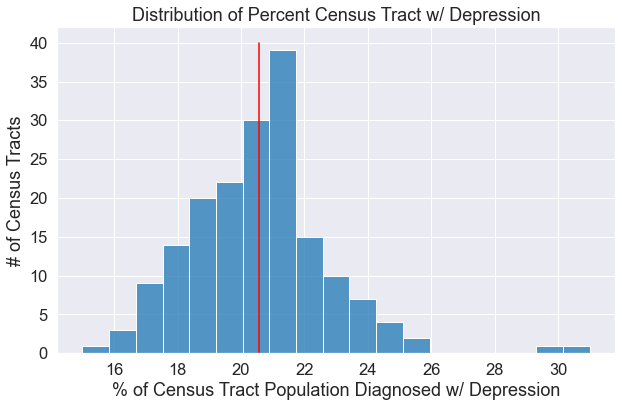

In [23]:
print(f"In 2019, the average depression rate within a D.C. census tract was {int(clean_df.depressed_19_perc.mean())}%.")

fig, ax1 = plt.subplots(ncols=1, figsize=(10,6))

print(clean_df.depressed_19_perc.isna().sum())

sns.histplot(data = clean_df,
            x = 'depressed_19_perc')
ax1.set_title("Distribution of Percent Census Tract w/ Depression")
ax1.set_xlabel("% of Census Tract Population Diagnosed w/ Depression")
ax1.set_ylabel("# of Census Tracts")

plt.plot([clean_df.depressed_19_perc.mean(), clean_df.depressed_19_perc.mean()], # where the vertical line should be plotted
         [0, 40], # the y min and y max - the y max should be the max value counts for that plot
         color='red')

In 2019, the average Black population within a D.C. census tract was 47%.
0


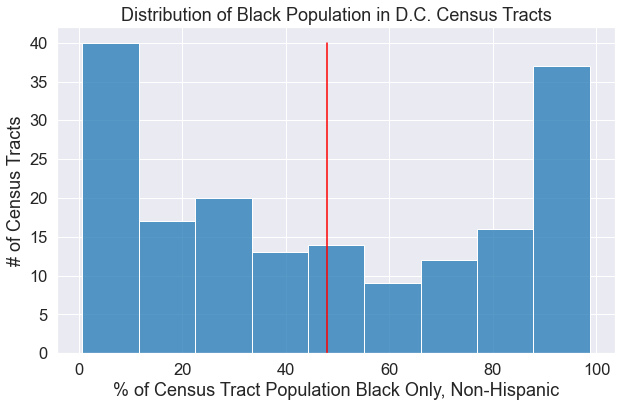

In [24]:
print(f"In 2019, the average Black population within a D.C. census tract was {int(clean_df.black_non_hisp_perc.mean())}%.")

# print(clean_df.black_non_hisp_perc.isna().sum())

fig, ax1 = plt.subplots(ncols=1, figsize=(10,6))

sns.histplot(data = clean_df,
            x = 'black_non_hisp_perc')
ax1.set_title("Distribution of Black Population in D.C. Census Tracts")
ax1.set_xlabel("% of Census Tract Population Black Only, Non-Hispanic")
ax1.set_ylabel("# of Census Tracts")

plt.plot([clean_df.black_non_hisp_perc.mean(), clean_df.black_non_hisp_perc.mean()], # where the vertical line should be plotted
         [0, 40], # the y min and y max - the y max should be the max value counts for that plot
         color='red')

In 2019, the average poverty rate within a D.C. census tract was 17%.


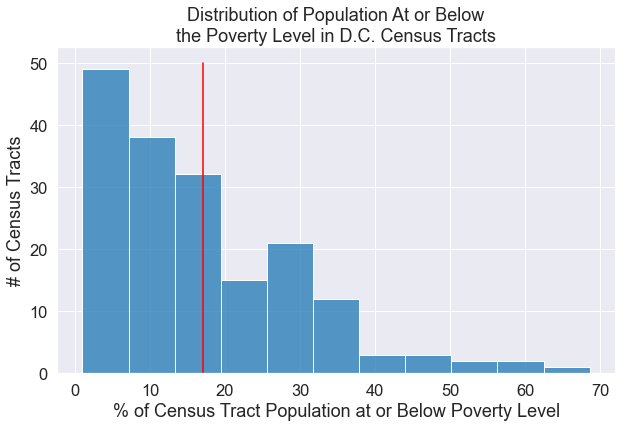

In [25]:
print(f"In 2019, the average poverty rate within a D.C. census tract was {int(clean_df.below_poverty_level_perc.mean())}%.")


# print(clean_df.below_poverty_level_perc.isna().sum())

fig, ax1 = plt.subplots(ncols=1, figsize=(10,6))
sns.histplot(data = clean_df,
            x = 'below_poverty_level_perc')
ax1.set_title("Distribution of Population At or Below\nthe Poverty Level in D.C. Census Tracts")
ax1.set_xlabel("% of Census Tract Population at or Below Poverty Level")
ax1.set_ylabel("# of Census Tracts")

plt.plot([clean_df.below_poverty_level_perc.mean(), clean_df.below_poverty_level_perc.mean()], # where the vertical line should be plotted
         [0, 50], # the y min and y max - the y max should be the max value counts for that plot
         color='red')

In 2019, the average rate of households without health insurance within a D.C. census tract was 3%.
The 5 D.C. census tracts with the highest rates of households without health insurance were
                                             census_tract_name  no_health_insurance_perc
Census Tract 92.04, District of Columbia, District of Columbia                      19.2
Census Tract 28.02, District of Columbia, District of Columbia                      14.5
Census Tract 25.01, District of Columbia, District of Columbia                      13.6
Census Tract 88.03, District of Columbia, District of Columbia                      12.3
Census Tract 95.07, District of Columbia, District of Columbia                      10.5


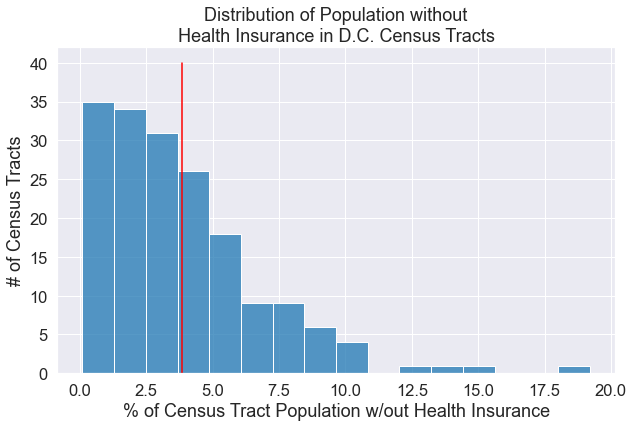

In [49]:
print(f"In 2019, the average rate of households without health insurance within a D.C. census tract was {int(clean_df.no_health_insurance_perc.mean())}%.")
print(f"The 5 D.C. census tracts with the highest rates of households without health insurance were")
print(clean_df.sort_values(by='no_health_insurance_perc', ascending=False)[['census_tract_name', 'no_health_insurance_perc']].head(5).to_string(index=False))
# print(clean_df.sort_values(by='households_no_vehicle_perc', ascending=False)['census_tract_name'].apply(lambda x: x[:x.index(',')]).head(5).to_string(index=False))

# print(clean_df.no_health_insurance_perc.isna().sum())

fig, ax1 = plt.subplots(ncols=1, figsize=(10,6))
sns.histplot(data = clean_df,
            x = 'no_health_insurance_perc')
ax1.set_title("Distribution of Population without\nHealth Insurance in D.C. Census Tracts")
ax1.set_xlabel("% of Census Tract Population w/out Health Insurance")
ax1.set_ylabel("# of Census Tracts")

plt.plot([clean_df.no_health_insurance_perc.mean(), clean_df.no_health_insurance_perc.mean()], # where the vertical line should be plotted
         [0, 40], # the y min and y max - the y max should be the max value counts for that plot
         color='red')

In 2019, on average 34% of households within a D.C. tract did not own a car.
The 5 D.C. tracts with the highest percentage of households without a car were:
                                                  census_tract_name  \
174    Census Tract 108, District of Columbia, District of Columbia   
92   Census Tract 74.01, District of Columbia, District of Columbia   
79      Census Tract 64, District of Columbia, District of Columbia   
173    Census Tract 107, District of Columbia, District of Columbia   
108  Census Tract 77.08, District of Columbia, District of Columbia   

     households_no_vehicle_perc  
174                        83.0  
92                         66.3  
79                         63.7  
173                        62.4  
108                        61.5  


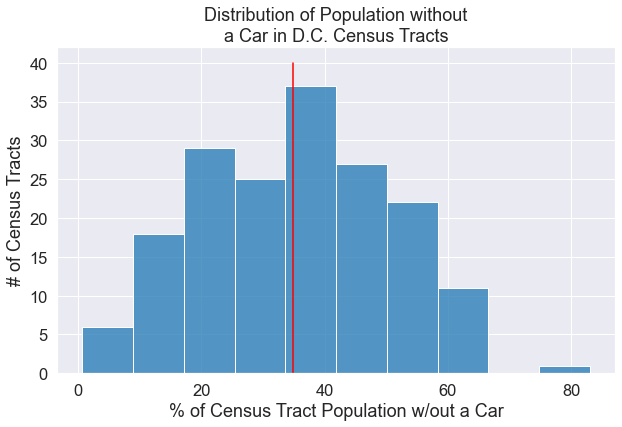

In [35]:
# print(clean_df.households_no_vehicle_perc.isna().sum())

fig, ax1 = plt.subplots(ncols=1, figsize=(10,6))
sns.histplot(data = clean_df,
            x = 'households_no_vehicle_perc')
ax1.set_title("Distribution of Population without\na Car in D.C. Census Tracts")
ax1.set_xlabel("% of Census Tract Population w/out a Car")
ax1.set_ylabel("# of Census Tracts")

plt.plot([clean_df.households_no_vehicle_perc.mean(), clean_df.households_no_vehicle_perc.mean()], # where the vertical line should be plotted
         [0, 40], # the y min and y max - the y max should be the max value counts for that plot
         color='red')

In [36]:
print(f"In 2019, on average {int(clean_df.households_no_vehicle_perc.mean())}% of households within a D.C. tract did not own a car.")
print(f"The 5 D.C. tracts with the highest percentage of households without a car were:")
clean_df.sort_values(by='households_no_vehicle_perc', ascending=False)[['census_tract_name', 'households_no_vehicle_perc']].head(5)

In 2019, on average 34% of households within a D.C. tract did not own a car.
The 5 D.C. tracts with the highest percentage of households without a car were:


,census_tract_name,households_no_vehicle_perc
174,"Census Tract 108, District of Columbia, District of Columbia",83.0
92,"Census Tract 74.01, District of Columbia, District of Columbia",66.3
79,"Census Tract 64, District of Columbia, District of Columbia",63.7
173,"Census Tract 107, District of Columbia, District of Columbia",62.4
108,"Census Tract 77.08, District of Columbia, District of Columbia",61.5


0


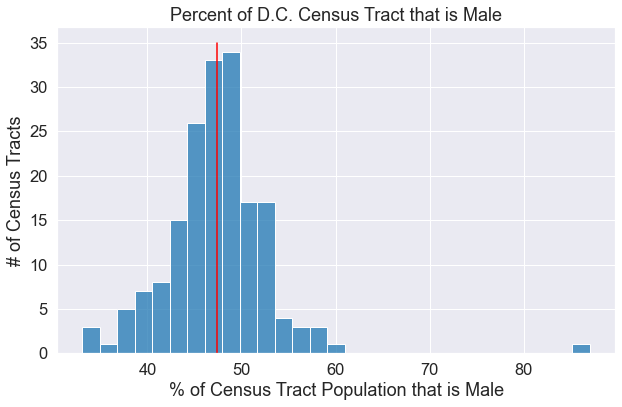

In [15]:
print(clean_df.male_perc.isna().sum())

fig, ax1 = plt.subplots(ncols=1, figsize=(10,6))
sns.histplot(data = clean_df,
            x = 'male_perc')
ax1.set_title("Percent of D.C. Census Tract that is Male")
ax1.set_xlabel("% of Census Tract Population that is Male")
ax1.set_ylabel("# of Census Tracts")

plt.plot([clean_df.male_perc.mean(), clean_df.male_perc.mean()], # where the vertical line should be plotted
         [0, 35], # the y min and y max - the y max should be the max value counts for that plot
         color='red')

# Create an indicator column for whether they are 2 standard deviations above (outliers)
* depressed_19_perc

In [84]:
for i in cols_to_check:
    clean_df['severe_'+i] = np.where(clean_df[i] > (clean_df[i].mean()+2*clean_df[i].std()),
                                     True,
                                     False)

clean_df['counts_severe'] = clean_df[['severe_'+i for i in cols_to_check]].apply(lambda x: sum(x), axis= 'columns')

# see for how many tracts this is true
clean_df['counts_severe'].value_counts()

0    161
1     14
3      2
2      1
Name: counts_severe, dtype: int64

# Create an indicator column for whether that census tract has > 50% Black population

In [82]:
cols_to_check = ['depressed_19_perc',
                'below_poverty_level_perc',
                'no_health_insurance_perc',
                'households_no_vehicle_perc'
                ]

In [80]:
clean_df['majority_black_population'] = clean_df['black_non_hisp_perc'] > 50
clean_df.majority_black_population.value_counts()

False    96
True     82
Name: majority_black_population, dtype: int64

In [81]:
majority_black_pop = clean_df[clean_df.majority_black_population].copy(deep=True)
print(len(clean_df))
print(len(majority_black_pop)) 

178
82


In [93]:
clean_df.columns
clean_df.census_tract_name.head()

0       Census Tract 1, District of Columbia, District of Columbia
1    Census Tract 2.01, District of Columbia, District of Columbia
2    Census Tract 2.02, District of Columbia, District of Columbia
3       Census Tract 3, District of Columbia, District of Columbia
4       Census Tract 4, District of Columbia, District of Columbia
Name: census_tract_name, dtype: object

In [97]:
for i in cols_to_check:
    print(i)
    print("\t", clean_df[i].mean())
#     print(clean_df[['census_tract_name', i]].sort_values(by=i, ascending=False).head().to_string(index=False))
    print("\t", majority_black_pop[i].mean())
    print(majority_black_pop.sort_values(by=i, ascending=False)[['census_tract_name', i]].head(5).to_string(index=False))

depressed_19_perc
	 20.56292134831461
	 20.25487804878048
                                             census_tract_name  depressed_19_perc
Census Tract 88.03, District of Columbia, District of Columbia               25.7
Census Tract 74.01, District of Columbia, District of Columbia               25.7
Census Tract 74.06, District of Columbia, District of Columbia               24.6
Census Tract 98.02, District of Columbia, District of Columbia               23.8
Census Tract 74.08, District of Columbia, District of Columbia               23.6
below_poverty_level_perc
	 17.10561797752809
	 24.91585365853658
                                             census_tract_name  below_poverty_level_perc
Census Tract 74.01, District of Columbia, District of Columbia                      68.6
Census Tract 98.02, District of Columbia, District of Columbia                      60.6
Census Tract 74.08, District of Columbia, District of Columbia                      59.5
Census Tract 74.06, District 

In [16]:
# print(clean_df.income_inequality_gini_index.isna().sum())

# fig, ax1 = plt.subplots(ncols=1, figsize=(10,6))
# sns.histplot(data = clean_df,
#             x = 'income_inequality_gini_index')
# ax1.set_title("Percent of D.C. Census Tract that is Male")
# ax1.set_xlabel("% of Census Tract Population that is Male")
# ax1.set_ylabel("# of Census Tracts")

# plt.plot([clean_df.income_inequality_gini_index.mean(), clean_df.income_inequality_gini_index.mean()], # where the vertical line should be plotted
#          [0, 35], # the y min and y max - the y max should be the max value counts for that plot
#          color='red')

In [17]:
clean_df.income_inequality_gini_index.min()

-666666666.0

In [18]:
clean_df.columns

Index(['census_tract_id', 'depressed_19_perc', 'census_tract_name',
       'black_non_hisp_perc', 'white_non_hisp_perc', 'hispanic_latino_perc',
       '3_plus_cre_risk_factors_perc', 'below_poverty_level_perc',
       'no_health_insurance_perc', 'male_perc', 'female_perc',
       'income_inequality_gini_index', 'hs_grad_perc',
       'households_no_vehicle_perc', 'households_w_internet_perc'],
      dtype='object')